In [1]:
import import_ipynb
from ConsistencyIndexes import *
import matplotlib.pyplot as plt 

importing Jupyter notebook from ConsistencyIndexes.ipynb
importing Jupyter notebook from Functions.ipynb


In [2]:
cap = open_vid("Cartoonized/Xtoon.mp4")
Org = get_frames(cap)
_,_,fps,_ = get_props(cap)

Width:  640
Height:  320
FPS:  24.0
Frame Count:  36


In [3]:
Inc,_ = AddInc(Org,3)

In [30]:
ThroughFrames(Inc)

In [5]:
F = Inc

54.22168093213848


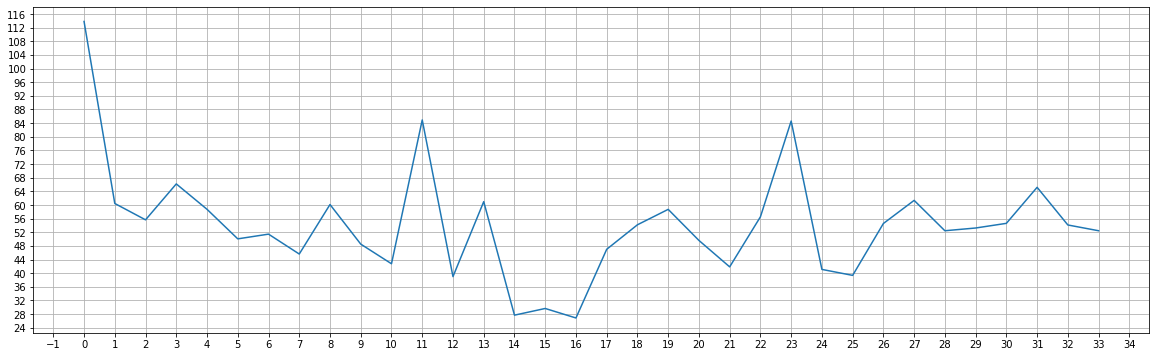

In [6]:
C,Consistency = Vid_consistency(F,Abs_Dif)
plt.figure(figsize=(20,6))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(len(F)//20))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator((max(Consistency)-min(Consistency))//20))
plt.plot(np.asarray(range(len(Org)-2)),Consistency)
plt.grid()
print(C)

3.649662990196119


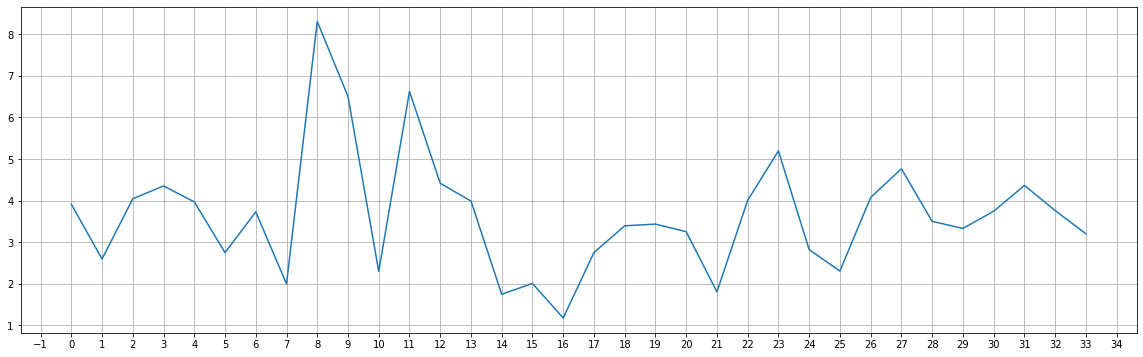

In [7]:
C,Consistency = Vid_consistency(F,Gray_Dif)
plt.figure(figsize=(20,6))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(len(F)//20))  # Major ticks every 1 unit on x-axis
#plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.plot(np.asarray(range(len(Org)-2)),Consistency)
plt.grid()
print(C)

305.2781524761338


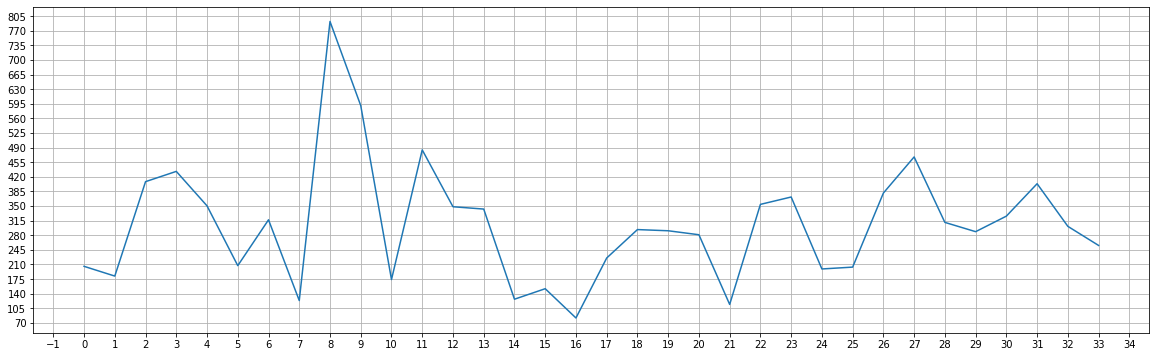

In [8]:
C,Consistency = Vid_consistency(F,MSE)
plt.figure(figsize=(20,6))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(len(F)//20))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator((max(Consistency)-min(Consistency))//20))
plt.plot(np.asarray(range(len(Org)-2)),Consistency)
plt.grid()
print(C)

10.0880859375


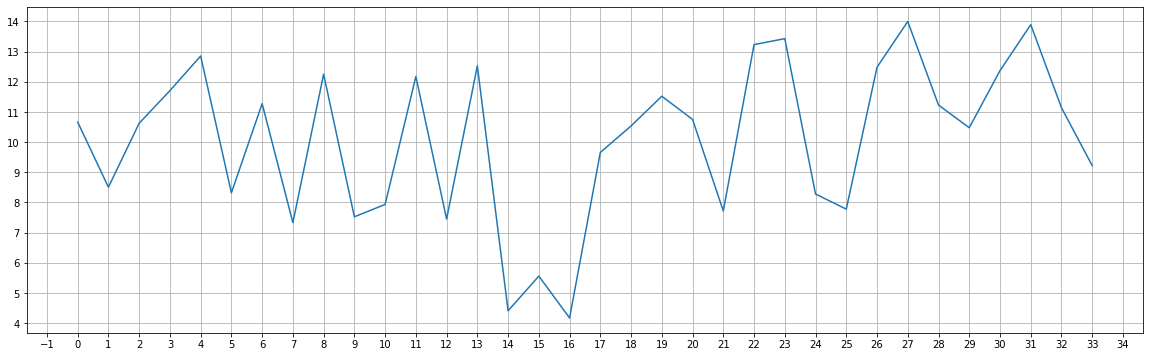

In [9]:
C,Consistency = Vid_consistency(F,Border_Err)
plt.figure(figsize=(20,6))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(len(F)//20))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))
plt.plot(np.asarray(range(len(Org)-2)),Consistency)
plt.grid()
print(C)

0.7598039215686274


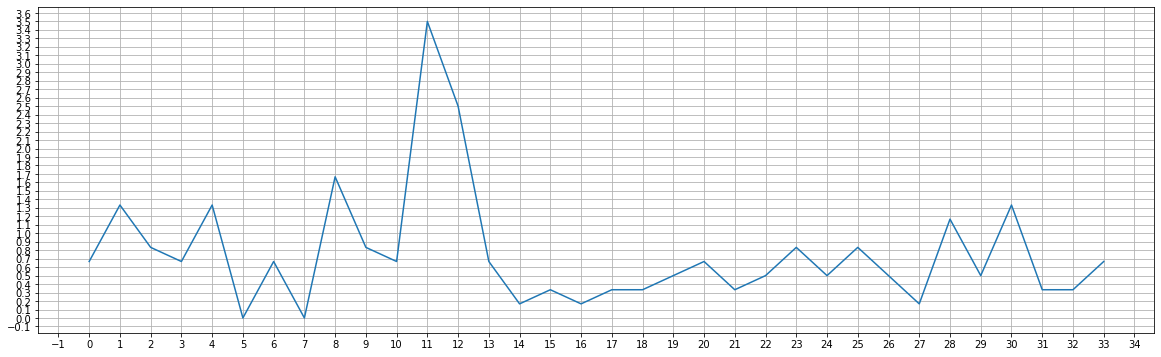

In [10]:
C,Consistency = Vid_consistency(F,CRC)
plt.figure(figsize=(20,6))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(len(F)//20))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.plot(np.asarray(range(len(Org)-2)),Consistency)
plt.grid()
print(C)

0.019565101834377246


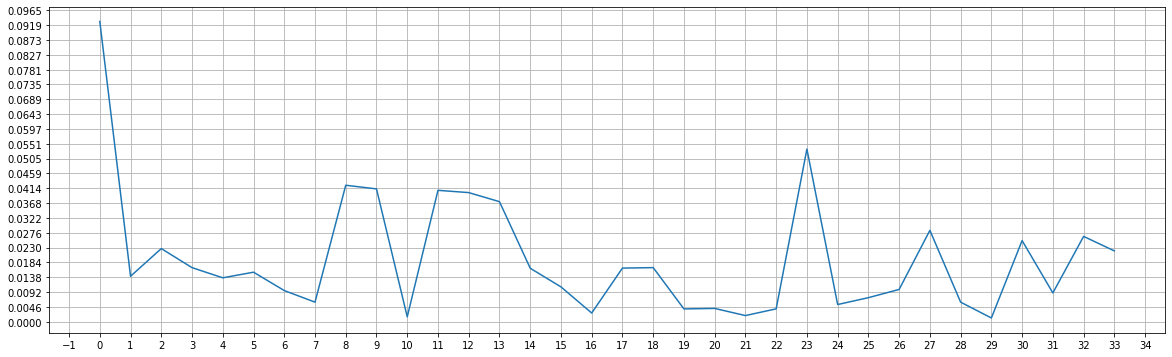

In [11]:
C,Consistency = Vid_consistency(F,Entropy_Dif)
plt.figure(figsize=(20,6))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(len(F)//20))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator((max(Consistency)-min(Consistency))/20))
plt.plot(np.asarray(range(len(Org)-2)),Consistency)
plt.grid()
print(C)

0.07758364870019567


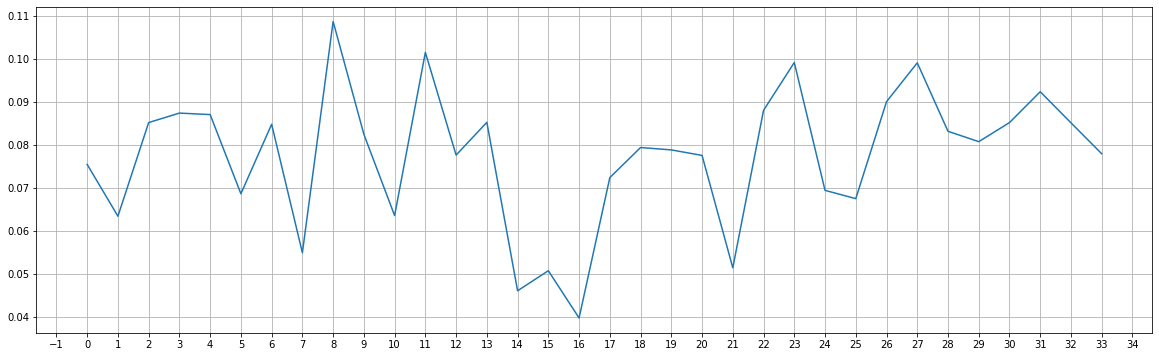

In [12]:
C,Consistency = Vid_consistency(F,Freq_Dif)
plt.figure(figsize=(20,6))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(len(F)//20))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.01))
plt.plot(np.asarray(range(len(Org)-2)),Consistency)
plt.grid()
print(C)

0.7774954019860301


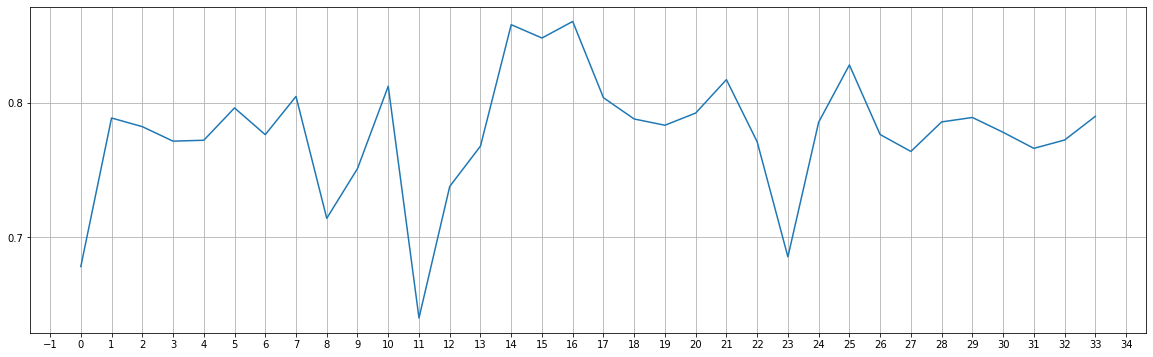

In [13]:
C,Consistency = Vid_consistency(F,TSNR)
plt.figure(figsize=(20,6))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(len(F)//20))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.plot(np.asarray(range(len(Org)-2)),Consistency)
plt.grid()
print(C)

0.08645468771857512


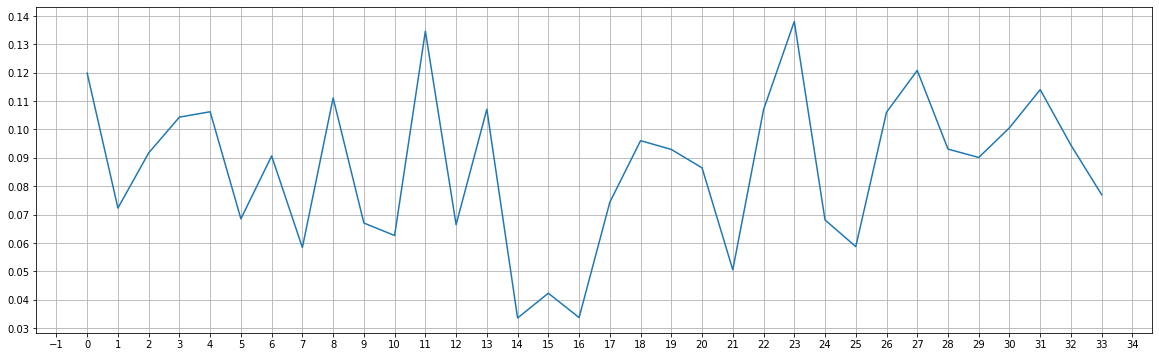

In [14]:
C,Consistency = Vid_consistency(F,TSSIM)
plt.figure(figsize=(20,6))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(len(F)//20))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.01))
plt.plot(np.asarray(range(len(Org)-2)),Consistency)
plt.grid()
print(C)

6.938157308054405


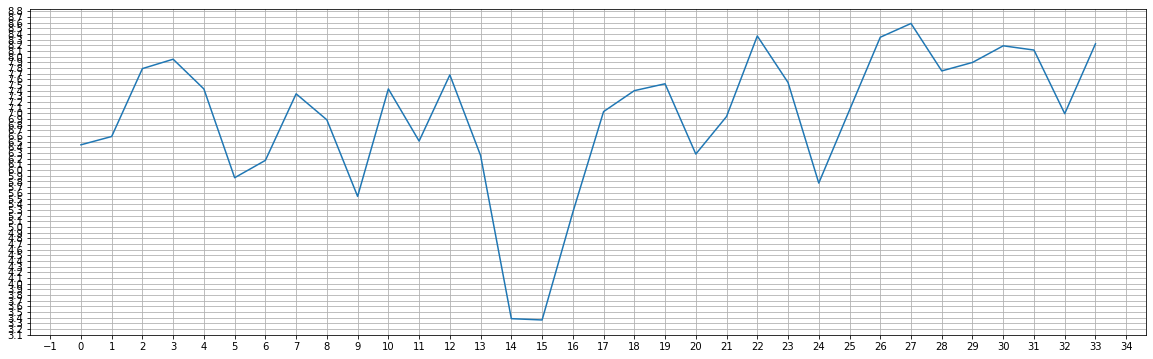

In [15]:
C,Consistency = Vid_consistency(F,OF)
plt.figure(figsize=(20,6))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(len(F)//20))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.plot(np.asarray(range(len(Org)-2)),Consistency)
plt.grid()
print(C)

5.489612952067663


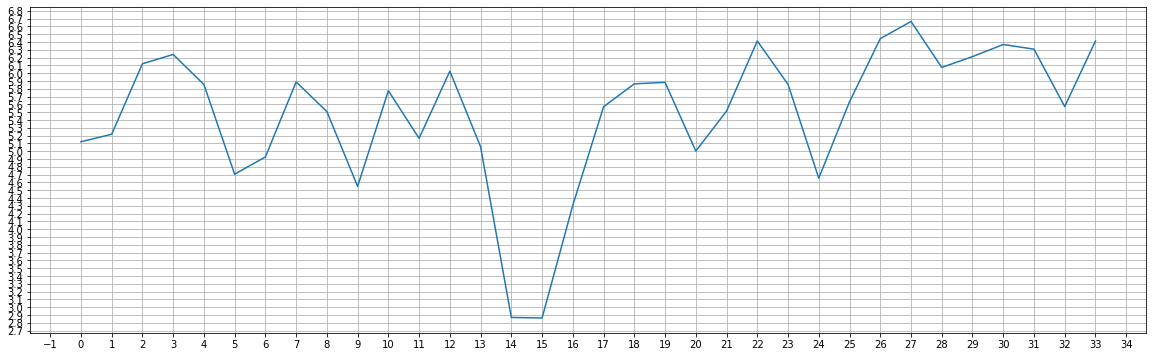

In [16]:
C,Consistency = Vid_consistency(F,OF_B)
plt.figure(figsize=(20,6))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(len(F)//20))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.plot(np.asarray(range(len(Org)-2)),Consistency)
plt.grid()
print(C)

In [17]:
def WinCon(img1,img2,img3=None,Fun=Abs_Dif,Div=10):
    wh = img1.shape[0]//Div
    ww = img1.shape[1]//Div
    Metrics = np.zeros((Div,Div))
    x = 0
    for i in range(0,img1.shape[0],wh):
        y = 0
        for j in range(0,img1.shape[1],ww):
            Metrics[x,y] = Fun(img1[i:i+wh,j:j+ww],img2[i:i+wh,j:j+ww],img3[i:i+wh,j:j+ww])
            y = y + 1
        x = x + 1
    return Metrics

In [18]:
def draw_grid_with_text(img, text_matrix):
    image = np.copy(img)
    # Get the height and width of the image
    height, width, _ = image.shape
    N = text_matrix.shape[0]
    # Calculate the size of each grid cell
    cell_height = height // N
    cell_width = width // N
    x,y = np.unravel_index(np.argmax(text_matrix, axis=None),text_matrix.shape)    
    # Iterate through the grid and draw lines and text
    for i in range(N):
        for j in range(N):
            # Calculate the top-left corner of the current grid cell
            top_left_x = j * cell_width
            top_left_y = i * cell_height
            bottom_right_x = (j + 1) * cell_width
            bottom_right_y = (i + 1) * cell_height            
            # Draw the rectangle (grid cell)
            if i==x and j==y:
                cv2.rectangle(image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 0, 255), 2)
            else:
                cv2.rectangle(image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 255, 0), 2)            
            # Calculate the position for the text to be centered
            text = str(round(text_matrix[i, j].copy(),3))
            font_scale = 0.5
            font_thickness = 1
            text_size, _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
            text_x = top_left_x + (cell_width - text_size[0]) // 2
            text_y = top_left_y + (cell_height + text_size[1]) // 2           
            # Draw the text
            cv2.putText(image, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 0, 0), font_thickness, lineType=cv2.LINE_AA)
    return image

#### [Abs_Dif,Gray_Dif,MSE,Border_Err,CRC,Entropy_Dif,Freq_Dif,TSNR,TSSIM,OF,OF_B];

In [32]:
Func = Freq_Dif
R = [draw_grid_with_text(Inc[k+1],WinCon(Inc[k],Inc[k+1],Inc[k+2],Func,10)) for k in range(len(Inc)-2)]

In [33]:
ThroughFrames([cv2.resize(r,(800,600)) for r in R])

In [29]:
cap = open_vid("VDB/X.mp4")
org = get_frames(cap)
_,_,fps,_ = get_props(cap)
ThroughFrames(org)

Width:  640
Height:  320
FPS:  24.0
Frame Count:  36


In [34]:
O = cartoonize_vid(org,200,255)

In [35]:
ThroughFrames(O)

Jugar con la region caricaturizada
Comparar real y cartoon con red y generar 
Generar filtros con red
Kernels para cada paso de cartoon
Asumir serie de kernels en cada paso
No MaxPooling
comparar org y aplicado el kernel